In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#Importing dataset
Dataset from kaggle: https://www.kaggle.com/datasets/thedevastator/airbnb-prices-in-european-cities

Create shortcut to folder in Google Drive (https://drive.google.com/drive/folders/14sWbVJNZlC91WNW8AUcy3pZj-fRgXcoD?usp=sharing) and mount Drive to run the cell below

Or download dataset and manually upload to run the following cell

In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive')
folder_path = '/content/drive/My Drive/AirBNB_datasets'

# Create an empty list to store the dataframes
all_dataframes = []

# Iterate through all files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):  # Check if it's a CSV file
        file_path = os.path.join(folder_path, filename)
        try:
            df = pd.read_csv(file_path)
            all_dataframes.append(df)
            print(f"Successfully read {filename}")
        except Exception as e:
            print(f"Error reading {filename}: {e}")


if all_dataframes:
    combined_df = pd.concat(all_dataframes, ignore_index=True)
    combined_df.drop('Unnamed: 0', axis=1, inplace=True)
    print("Combined dataframe:")
    print(combined_df.head())
else:
    print("No CSV files found in the specified folder.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Successfully read amsterdam_weekdays.csv
Successfully read rome_weekdays.csv
Successfully read lisbon_weekdays.csv
Successfully read vienna_weekdays.csv
Successfully read barcelona_weekdays.csv
Successfully read athens_weekdays.csv
Successfully read berlin_weekdays.csv
Successfully read london_weekdays.csv
Successfully read budapest_weekdays.csv
Successfully read paris_weekdays.csv
Combined dataframe:
      realSum     room_type  room_shared  room_private  person_capacity  \
0  194.033698  Private room        False          True              2.0   
1  344.245776  Private room        False          True              4.0   
2  264.101422  Private room        False          True              2.0   
3  433.529398  Private room        False          True              4.0   
4  485.552926  Private room        False          True              2.0   

   host_is_supe

In [ ]:
# Read in all csv files  combine into a single dataframe [manual method]

Vienna_DF2 = pd.read_csv("vienna_weekdays.csv")
Rome_DF2 =  pd.read_csv("rome_weekdays.csv")
Paris_DF2 =  pd.read_csv("paris_weekdays.csv")
London_DF2 = pd.read_csv("london_weekdays.csv")
Lisbon_DF2 = pd.read_csv("lisbon_weekdays.csv")
Budapest_DF2 = pd.read_csv("budapest_weekdays.csv")
Berlin_DF2 =  pd.read_csv("berlin_weekdays.csv")
Barcelona_DF2 = pd.read_csv("barcelona_weekdays.csv")
Athens_DF2 = pd.read_csv("athens_weekdays.csv")
Amsterdam_DF2 = pd.read_csv("amsterdam_weekdays.csv")

combined_df = pd.concat([ Vienna_DF2,  Rome_DF2, Paris_DF2, London_DF2,  Lisbon_DF2,
               Budapest_DF2,  Berlin_DF2,  Barcelona_DF2,
                Athens_DF2,  Amsterdam_DF2], ignore_index=True)
combined_df.drop('Unnamed: 0', axis=1, inplace=True)

print(df.columns)

#Data Preprocessing

In [ ]:
# Model Data frame, excludes the variables which are not being examined
# duplicate_rows = combined_df[combined_df['lng'].duplicated(keep=False)]
# print(duplicate_rows)

columns_to_drop = ['lng', 'lat', 'multi', 'biz', 'bedrooms', 'person_capacity', 'attr_index_norm', 'rest_index_norm', 'room_type', 'room_shared']
Mdf = combined_df.drop(columns = columns_to_drop)
Mdf['room_private'] = Mdf['room_private'].astype(int)
Mdf['host_is_superhost'] = Mdf['host_is_superhost'].astype(int)
display(Mdf.head())
print(Mdf.columns)

,realSum,room_private,host_is_superhost,cleanliness_rating,guest_satisfaction_overall,dist,metro_dist,attr_index,rest_index
0,194.033698,1,0,10.0,93.0,5.022964,2.539380,78.690379,98.253896
1,344.245776,1,0,8.0,85.0,0.488389,0.239404,631.176378,837.280757
2,264.101422,1,0,9.0,87.0,5.748312,3.651621,75.275877,95.386955
3,433.529398,1,0,9.0,90.0,0.384862,0.439876,493.272534,875.033098
4,485.552926,1,1,10.0,98.0,0.544738,0.318693,552.830324,815.305740


Index(['realSum', 'room_private', 'host_is_superhost', 'cleanliness_rating',
       'guest_satisfaction_overall', 'dist', 'metro_dist', 'attr_index',
       'rest_index'],
      dtype='object')


In [ ]:
#testing which features do not improve the models
# Mdf.drop('attr_index', axis=1, inplace=True)     #minutely improved svm & logistic
# Mdf.drop('rest_index', axis=1, inplace=True)     #only improved logistic
# Mdf.drop('dist', axis=1, inplace=True)           #only improved svm
# Mdf.drop('room_private', axis=1, inplace=True)    #improved linear & gb
# Mdf.drop('realSum', axis=1, inplace=True)         #improved svm & gb
# Mdf.drop('metro_dist', axis=1, inplace=True)        #improved svm & logistic

In [ ]:
#Ensuring no missing values
Mdf.isna().sum()

,0
realSum,0
room_private,0
host_is_superhost,0
cleanliness_rating,0
guest_satisfaction_overall,0
dist,0
metro_dist,0
attr_index,0
rest_index,0


In [ ]:
from sklearn.model_selection import train_test_split

def split_data(data):
  X = data.drop(columns=['guest_satisfaction_overall'])
  y = data['guest_satisfaction_overall']
  X_train, X_test, y_train, y_test = train_test_split(
      X, y, test_size=0.2, random_state=42
  )
  return X_train, X_test, y_train, y_test

# Apply the function to the loaded data
X_train, X_test, y_train, y_test = split_data(Mdf)


X_train.shape, X_test.shape, y_train.shape, y_test.shape

# display (X_train.head())
# display (y_train.head())
# y_train.mean()

,realSum,room_private,host_is_superhost,cleanliness_rating,dist,metro_dist,attr_index,rest_index
14053,91.861364,0,0,10.0,1.929327,0.496256,112.743240,191.766702
11448,129.401634,1,0,9.0,4.416066,0.397388,198.536721,319.688067
16720,258.943061,1,0,9.0,0.718686,0.334719,927.715121,2024.497803
13822,179.738945,0,1,10.0,0.792861,0.200044,308.301500,529.639276
24220,194.333116,0,0,9.0,1.944837,0.059710,279.163183,746.898904


,guest_satisfaction_overall
14053,100.0
11448,92.0
16720,92.0
13822,100.0
24220,92.0


np.float64(92.59058823529412)

In [ ]:
from sklearn.preprocessing import StandardScaler

def scale_data(X_train, X_test):
    """
    Scale the features using StandardScaler
    X_train: Pandas DataFrame
    X_test: Pandas DataFrame
    return: X_train_scaled, X_test_scaled
    """
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled
    #return X_train_scaled, X_test_scaled

X_train_scaled, X_test_scaled = scale_data(X_train, X_test)

display(X_train_scaled)

array([[-0.49372675, -0.76410139, -0.59169187, ..., -0.21705738,
        -0.80675843, -0.86112602],
       [-0.39317698,  1.30872685, -0.59169187, ..., -0.33242481,
        -0.42441167, -0.60693082],
       [-0.04620661,  1.30872685, -0.59169187, ..., -0.40555256,
         2.82524077,  2.78073192],
       ...,
       [-0.00540043,  1.30872685,  1.69006885, ..., -0.5020003 ,
        -0.04215641, -0.41970247],
       [-0.37944601,  1.30872685, -0.59169187, ...,  0.68109656,
        -0.39254745, -0.34522933],
       [ 0.06720751, -0.76410139, -0.59169187, ..., -0.67194803,
         1.24945266,  0.80948836]])

#Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression

def train_linear_model(X_train, y_train):
  """
  Train a Linear Regression model
  X_train: Numpy Array
  y_train: Numpy Array
  return: Trained Linear Regression model
  """
  lr_model = LinearRegression()
  lr_model.fit(X_train, y_train)
  return lr_model

# print(X_train_scaled)

linear_model = train_linear_model(X_train_scaled, y_train)
print("Coefficients:", linear_model.coef_)
print("Intercept:", linear_model.intercept_)
print(Mdf.columns)

[[-0.49372675 -0.76410139 -0.59169187 ... -0.21705738 -0.80675843
  -0.86112602]
 [-0.39317698  1.30872685 -0.59169187 ... -0.33242481 -0.42441167
  -0.60693082]
 [-0.04620661  1.30872685 -0.59169187 ... -0.40555256  2.82524077
   2.78073192]
 ...
 [-0.00540043  1.30872685  1.69006885 ... -0.5020003  -0.04215641
  -0.41970247]
 [-0.37944601  1.30872685 -0.59169187 ...  0.68109656 -0.39254745
  -0.34522933]
 [ 0.06720751 -0.76410139 -0.59169187 ... -0.67194803  1.24945266
   0.80948836]]
Coefficients: [ 0.08383301 -0.0799852   0.84130345  6.13679569 -0.02952763  0.19369229
  0.13413225 -0.47512306]
Intercept: 92.59058823529412
Index(['realSum', 'room_private', 'host_is_superhost', 'cleanliness_rating',
       'guest_satisfaction_overall', 'dist', 'metro_dist', 'attr_index',
       'rest_index'],
      dtype='object')


#Support Vector Regression Model

In [ ]:
from sklearn.svm import SVR

def train_svm_model(X_train, y_train):
    """
    Train a Support Vector Machine model
    X_train: Numpy Array
    y_train: Numpy Array
    return: Trained Support Vector Machine model
    """
    #model = SVR(kernel='sigmoid')
    model = SVR(kernel='rbf')
    model.fit(X_train, y_train)
    return model

svm_model = train_svm_model(X_train_scaled, y_train)

#Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression

def train_logistic_regression(X_train, y_train):
    """
    Trains a Logistic Regression model.


    X_train: Training features.
    y_train: Training target variable.

    Returns: trained LogisticRegression model.
    """
    logreg_model = LogisticRegression(max_iter = 1000)
    logreg_model.fit(X_train, y_train)
    return logreg_model

logistic_model = train_logistic_regression(X_train_scaled, y_train)


#Gradient Boosting Model

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

def train_gradient_boosting(X_train, y_train):
  '''
Trains a Gradient Boosting model.

X_train: Training features.
y_train: Training target variable.

Returns: trained GradientBoostingRegressor model.
  '''

  model = GradientBoostingRegressor(loss='absolute_error', learning_rate=0.1,
                                n_estimators=300, max_depth = 1,
                                random_state = 42, max_features = 5)
  model.fit(X_train, y_train)
  return model

gb_model = train_gradient_boosting(X_train_scaled, y_train)


#Evaluating Models

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
def evaluate_model(model, x_test, y_test):
    """
    Evaluate the performance of a regression model.
    model: Trained regression model
    X_test: Numpy Array (Test features)
    y_test: Numpy Array (True target values for the test set)
    prints MAE, MSE, R^2, and adjusted R^2 scores
    """

    n_train = len(X_train)
    n_test = len(x_test)

    y_pred = model.predict(x_test)

    MAE = mean_absolute_error(y_test, y_pred)
    MSE = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    adjR2_train = 1 - ( 1- r2 ) * ( n_train - 1 ) / ( n_train - x_test.shape[1] - 1 )
    adjR2_test = 1 - ( 1- r2 ) * ( n_test - 1 ) / ( n_test - x_test.shape[1] - 1 )

    print(f"Mean Absolute Error (MAE): {MAE}")
    print(f"Mean Squared Error (MSE): {MSE}")
    print(f"R-squared (R^2): {r2}")
    print(f"Adjusted R^2 (Train): {adjR2_train}")
    print(f"Adjusted R^2 (Test): {adjR2_test}\n")

    #return {"Mean Absolute Error": MAE, "Mean Squared Error": MSE, "R2": r2}


print("for Linear Model")
lr_metrics = evaluate_model(linear_model, X_test_scaled, y_test)

print("for SVM model")
svm_metrics = evaluate_model(svm_model, X_test_scaled, y_test)

print("for Logistic Model")
logreg_metrics = evaluate_model(logistic_model, X_test_scaled, y_test)

print("for Gradient Boosting Model")
gb_metrics = evaluate_model(gb_model, X_test_scaled, y_test)

for Linear Model
Mean Absolute Error (MAE): 3.965499543410419
Mean Squared Error (MSE): 38.16266662291317
R-squared (R^2): 0.5305579696612255
Adjusted R^2 (Train): 0.5303737934931754
Adjusted R^2 (Test): 0.5298202882150047

for SVM model
Mean Absolute Error (MAE): 3.851202846541704
Mean Squared Error (MSE): 41.964230368494086
R-squared (R^2): 0.4837946283878911
Adjusted R^2 (Train): 0.48359210556052135
Adjusted R^2 (Test): 0.4829834630033111

for Logistic Model
Mean Absolute Error (MAE): 4.5943137254901965
Mean Squared Error (MSE): 55.47117647058823
R-squared (R^2): 0.31764459845165893
Adjusted R^2 (Train): 0.317376889991437
Adjusted R^2 (Test): 0.3165723448251835

for Gradient Boosting Model
Mean Absolute Error (MAE): 3.8279192597865026
Mean Squared Error (MSE): 37.666457024758365
R-squared (R^2): 0.5366618838224944
Adjusted R^2 (Train): 0.5364801024027788
Adjusted R^2 (Test): 0.5359337940701039



#Visualizations

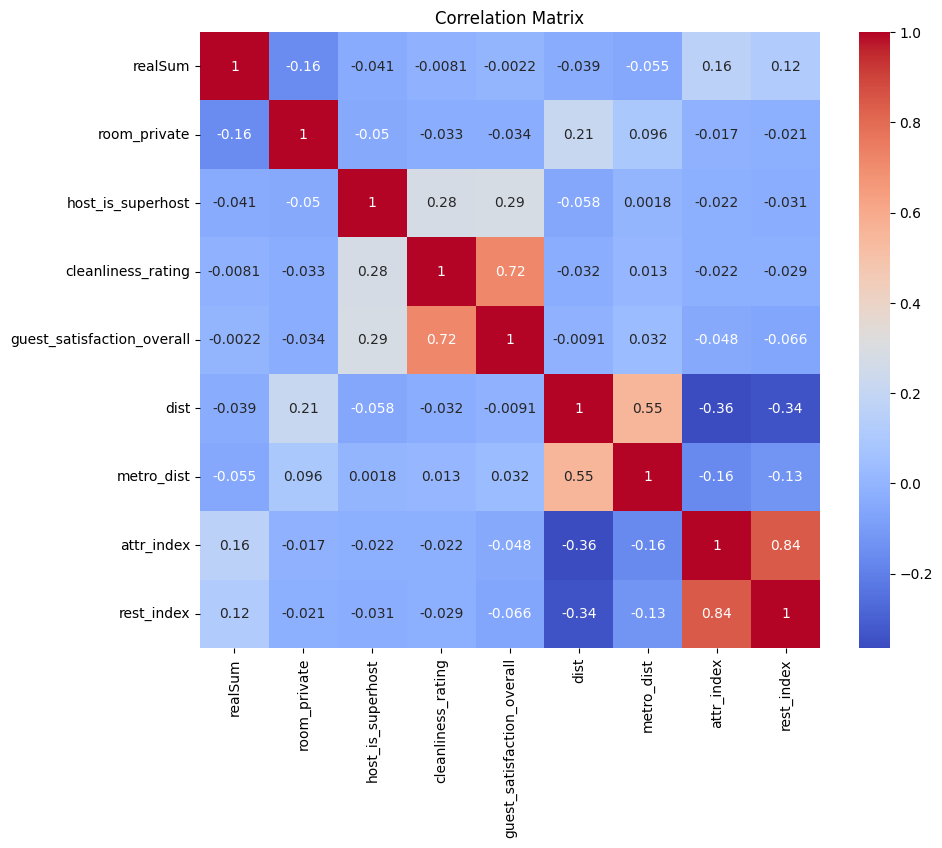

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 8))
correlation_matrix = Mdf.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


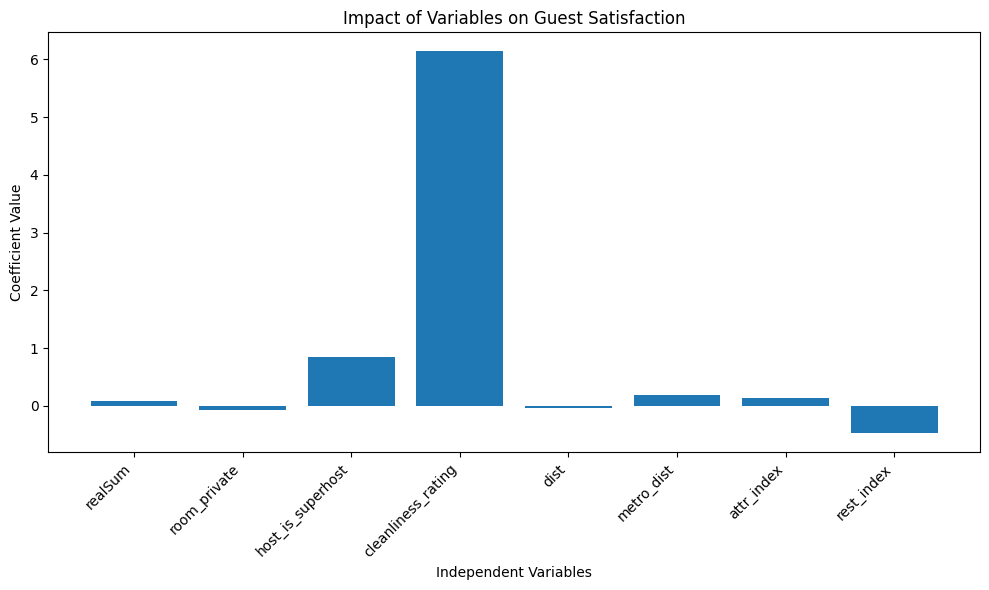

In [ ]:

import matplotlib.pyplot as plt


coefficients = linear_model.coef_
feature_names = X_train.columns

plt.figure(figsize=(10, 6))
plt.bar(feature_names, coefficients)
plt.xlabel("Independent Variables")
plt.ylabel("Coefficient Value")
plt.title("Impact of Variables on Guest Satisfaction")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
